In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [5]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
    r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
58/58 [==============================] - 59s 967ms/step - loss: 0.2344 - accuracy: 0.9061 - val_loss: 0.3385 - val_accuracy: 0.8529
Epoch 2/10
58/58 [==============================] - 38s 655ms/step - loss: 0.1673 - accuracy: 0.9471 - val_loss: 0.3470 - val_accuracy: 0.8529
Epoch 3/10
58/58 [==============================] - 55s 954ms/step - loss: 0.1129 - accuracy: 0.9607 - val_loss: 0.3639 - val_accuracy: 0.8382
Epoch 4/10
58/58 [==============================] - 45s 777ms/step - loss: 0.0998 - accuracy: 0.9689 - val_loss: 0.1536 - val_accuracy: 0.8971
Epoch 5/10
58/58 [==============================] - 56s 969ms/step - loss: 0.0734 - accuracy: 0.9765 - val_loss: 0.1565 - val_accuracy: 0.9265
Epoch 6/10
58/58 [==============================] - 38s 658ms/step - loss: 0.0737 - accuracy: 0.9765 - val_loss: 0.1484 - val_accuracy: 0.9265
Epoch 7/10
58/58 [==============================] - 45s 777ms/step - loss: 0.0618 - accuracy: 0.9760 - val_loss: 0.1674 - val_accuracy: 0.9412

In [9]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 1s 105ms/step


In [10]:
predictions

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [11]:
print(len(predictions))

68


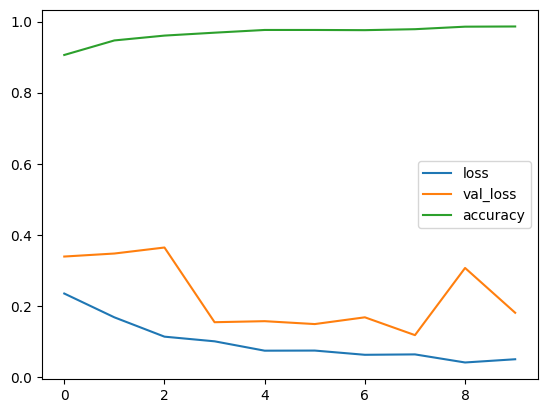

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

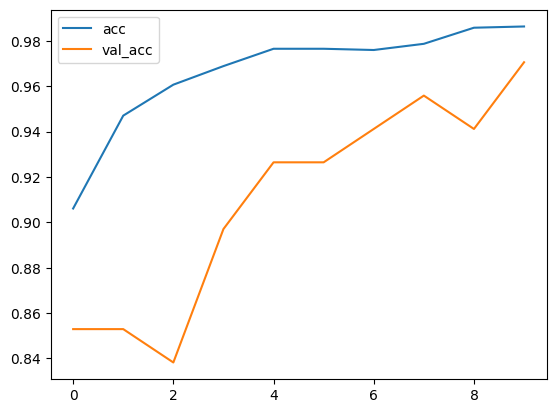

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [14]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 132ms/step
[[0.]]


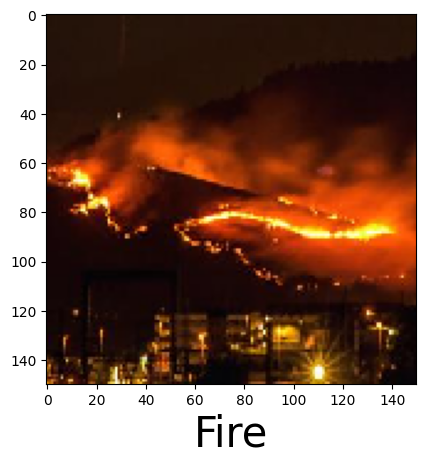

In [16]:
predictImage("Testing/fire/abc182.jpg")

1/1 [==============================] - 0s 39ms/step
[[0.]]


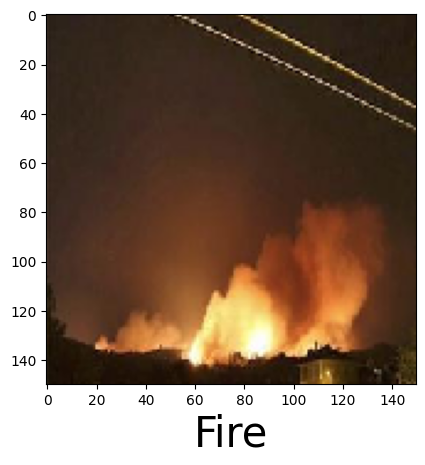

In [17]:
predictImage('Testing/fire/abc190.jpg')

1/1 [==============================] - 0s 34ms/step
[[1.]]


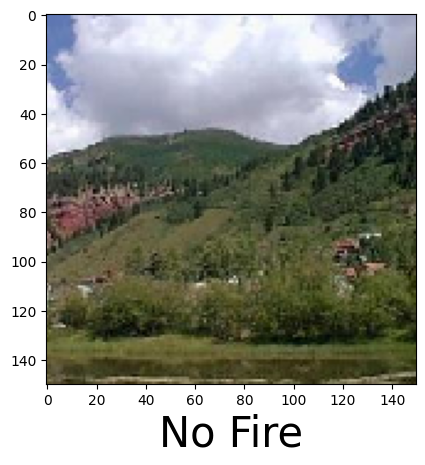

In [18]:
predictImage('Testing/nofire/abc346.jpg')

1/1 [==============================] - 0s 35ms/step
[[0.]]


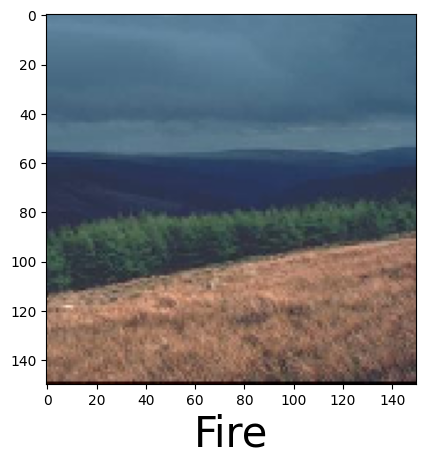

In [19]:
predictImage('Testing/nofire/abc341.jpg')